In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data saved in train.tsv, test.tsv, dev.tsv
# read data
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
dev = pd.read_csv('dev.tsv', sep='\t')


In [3]:
train

,index,sentence,labels
0,11724768_s0,Ghrelin was identified in the stomach as an en...,NaN
1,11724768_s1,"GHS-R is found in various tissues , but its fu...",NaN
2,11724768_s2,Here we show that GHS-R is found in hepatoma c...,NaN
3,11724768_s3,Exposure of these cells to ghrelin caused up-r...,sustaining proliferative signaling
4,11724768_s4,"Unlike insulin , ghrelin inhibited Akt kinase ...",NaN
...,...,...,...
10522,24477458_s5,TG2/NF-κB-induced increase in HIF-1α expressio...,NaN
10523,24477458_s6,Experimental suppression of TG2 attenuated HIF...,NaN
10524,24477458_s7,"Moreover , downregulation of p65/RelA or HIF-1...",cellular energetics
10525,24477458_s8,Our results suggest that aberrant expression o...,NaN


In [30]:
# count how many NaNs out of total
# train
print('train')
print(train.isnull().sum()[2])
print(train.shape[0])
# test
print('test')
print(test.isnull().sum()[2])
print(test.shape[0])
# dev
print('dev')
print(dev.isnull().sum()[2])
print(dev.shape[0])

train
7389
10527
test
2012
2896
dev
1070
1496


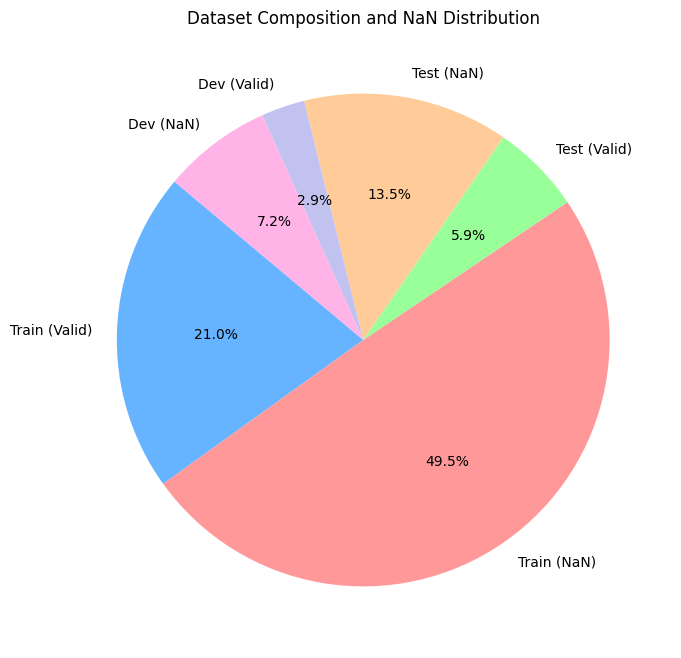

In [31]:
import matplotlib.pyplot as plt

# Data
train_nan = train.isnull().sum()[2]
train_total = train.shape[0]
test_nan = test.isnull().sum()[2]
test_total = test.shape[0]
dev_nan = dev.isnull().sum()[2]
dev_total = dev.shape[0]

labels = ['Train (Valid)', 'Train (NaN)', 'Test (Valid)', 'Test (NaN)', 'Dev (Valid)', 'Dev (NaN)']
sizes = [
    train_total - train_nan, train_nan,  # Train
    test_total - test_nan, test_nan,  # Test
    dev_total - dev_nan, dev_nan   # Dev
]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Dataset Composition and NaN Distribution")
plt.show()


In [ ]:
def process_paragraphs(train):
    # Extract paragraph ID from the index column
    train['paragraph_id'] = train['index'].apply(lambda x: x.split('_')[0])

    # Combine sentences into paragraphs
    train_paragraphs = train.groupby('paragraph_id')['sentence'].apply(' '.join).reset_index()

    # Extract unique atomic labels
    all_labels = train['labels'].dropna().str.split(',').explode().str.strip().unique()

    # Create a new dataframe with paragraph_id as the index
    label_columns = all_labels
    paragraph_labels = pd.DataFrame(0, index=train_paragraphs['paragraph_id'], columns=label_columns)

    # Fill in the label columns
    for _, row in train.dropna(subset=['labels']).iterrows():
        paragraph_id = row['paragraph_id']
        labels = row['labels'].split(',')
        for label in labels:
            label = label.strip()
            if label in paragraph_labels.columns:
                paragraph_labels.at[paragraph_id, label] = 1

    # Reset index to make paragraph_id a column
    paragraph_labels.reset_index(inplace=True)

    # Merge with train_paragraphs
    train_paragraphs = train_paragraphs.merge(paragraph_labels, on="paragraph_id")

    return train_paragraphs

# Example usage:
edited_train = process_paragraphs(train)
edited_train

,paragraph_id,sentence,sustaining proliferative signaling,evading growth suppressors,resisting cell death,avoiding immune destruction,activating invasion and metastasis,tumor promoting inflammation,enabling replicative immortality,genomic instability and mutation,inducing angiogenesis,cellular energetics
0,11724768,Ghrelin was identified in the stomach as an en...,1,0,0,0,0,0,0,0,0,0
1,11773160,PURPOSE The epidermal growth factor receptor (...,1,1,1,0,0,0,0,0,0,0
2,11774243,Adoptive transfer of immunity against hepatiti...,0,0,0,1,0,0,0,0,0,0
3,11781072,The secretion of immunosuppressive factors lik...,1,0,1,1,0,0,0,0,0,0
4,11791181,To characterize the impact of increased produc...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,24343302,Tumour cells primarily utilize aerobic glycoly...,0,0,0,0,0,0,0,0,0,1
1104,24366173,Our previous study demonstrated that 5-aminole...,0,0,1,0,0,0,0,0,0,1
1105,24367685,Ceramide is a sphingolipid metabolite that ind...,0,0,1,0,0,0,0,0,0,1
1106,24398380,High-throughput screening of a small-molecule ...,0,0,0,0,0,0,0,0,0,1


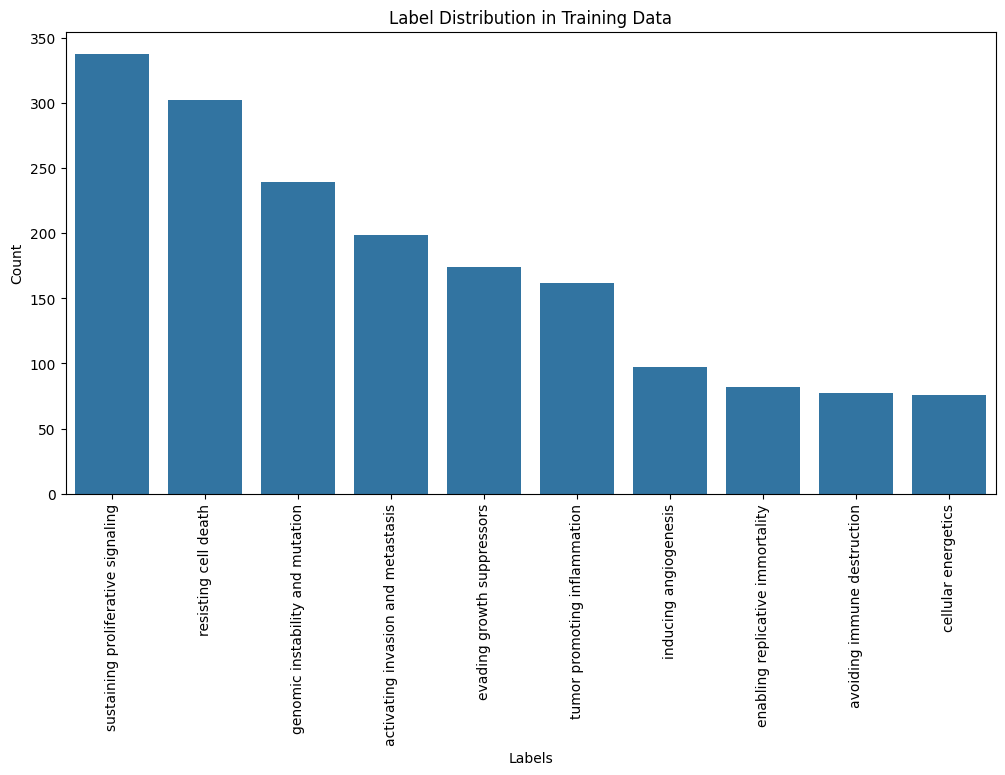

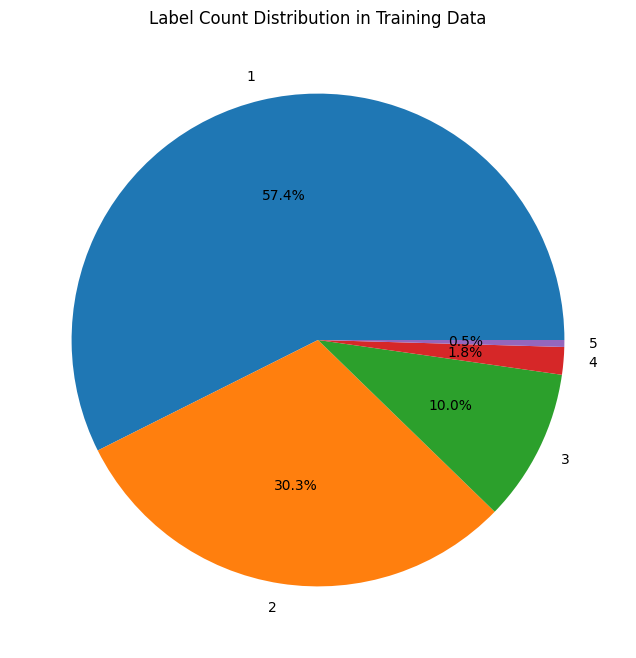

In [33]:
# do some visualizations

# first draw a bar chart of how many support cases for each label
label_counts = edited_train.iloc[:, 2:].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Count')

plt.title('Label Distribution in Training Data')
plt.show()

# then draw a pie chart of how many label supported for each paragraph
# count the number of labels for each paragraph
edited_train['label_count'] = edited_train.iloc[:, 2:].sum(axis=1)
plt.figure(figsize=(8, 8))
plt.pie(edited_train['label_count'].value_counts(), labels=edited_train['label_count'].value_counts().index, autopct='%1.1f%%')
plt.title('Label Count Distribution in Training Data')
plt.show()

